# Benchmark 

In [1]:
%load_ext autoreload
%autoreload 2


In [3]:
import os
import numpy as np
import scanpy as sc
import time
from pathlib import Path
import torch
import concord as ccd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib as mpl
from scipy import sparse

# from matplotlib import font_manager, rcParams
# custom_rc = {
#     'font.family': 'Arial',  # Set the desired font for this plot
# }

# mpl.rcParams['svg.fonttype'] = 'none'
# mpl.rcParams['pdf.fonttype'] = 42

/wynton/group/gartner/zuzhi/.conda/envs/scenv/lib/python3.13/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [4]:
proj_name = "pbmc_DeSimone_10K"
file_name = "template_pbmc_10K"
file_suffix = time.strftime('%b%d-%H%M')

# save_dir = Path(f"../save/{proj_name}-{file_suffix}")
# save_dir.mkdir(parents=True, exist_ok=True)

data_dir = Path(f"../data/{proj_name}")
data_dir.mkdir(parents=True, exist_ok=True)

seed = 0
ccd.ul.set_seed(seed)

In [ ]:
# load the data
adata = sc.read_h5ad(data_dir / f"{file_name}.h5ad")

In [34]:
# create jobs for integration methods

proj_name = 'pbmc_DeSimone_10K'
adata_filename = 'template_pbmc_10K_preprocessed.h5ad'
methods = 'concord scvi harmony scanorama liger unintegrated'
batch_key = 'dataset'
state_key = 'cell_type'
output_dir = '../jobs'
device = 'auto'
conda_env = 'scenv'
# mem = '16G'; scratch = '100G'; runtime = '02:00:00'; 

!python generate_py_sh_jobs.py \
  --proj_name {proj_name} \
  --adata_filename {adata_filename} \
  --methods {methods} \
  --batch_key {batch_key} \
  --state_key {state_key} \
  --output_dir {output_dir} \
  --device {device}

✅ Generated: benchmark_pbmc_DeSimone_10K/benchmark_pbmc_DeSimone_10K_concord.py
✅ Generated: benchmark_pbmc_DeSimone_10K/benchmark_pbmc_DeSimone_10K_concord.sh

✅ Generated: benchmark_pbmc_DeSimone_10K/benchmark_pbmc_DeSimone_10K_scvi.py
✅ Generated: benchmark_pbmc_DeSimone_10K/benchmark_pbmc_DeSimone_10K_scvi.sh

✅ Generated: benchmark_pbmc_DeSimone_10K/benchmark_pbmc_DeSimone_10K_harmony.py
✅ Generated: benchmark_pbmc_DeSimone_10K/benchmark_pbmc_DeSimone_10K_harmony.sh

✅ Generated: benchmark_pbmc_DeSimone_10K/benchmark_pbmc_DeSimone_10K_scanorama.py
✅ Generated: benchmark_pbmc_DeSimone_10K/benchmark_pbmc_DeSimone_10K_scanorama.sh

✅ Generated: benchmark_pbmc_DeSimone_10K/benchmark_pbmc_DeSimone_10K_liger.py
✅ Generated: benchmark_pbmc_DeSimone_10K/benchmark_pbmc_DeSimone_10K_liger.sh

✅ Generated: benchmark_pbmc_DeSimone_10K/benchmark_pbmc_DeSimone_10K_unintegrated.py
✅ Generated: benchmark_pbmc_DeSimone_10K/benchmark_pbmc_DeSimone_10K_unintegrated.sh



In [35]:
methods = 'scvi harmony scanorama liger unintegrated'

In [36]:
job_dir = Path(output_dir) / f"benchmark_{proj_name}"

method_list = methods.strip().split()

for method in method_list:
    sh_path = job_dir / f"benchmark_{proj_name}_{method}.sh"
    if sh_path.exists():
        print(f"✅ Submitting: {sh_path}")
        os.system(f"sh {sh_path}")
    else:
        print(f"⚠️  Skipped: {sh_path} not found")

✅ Submitting: ../jobs/benchmark_pbmc_DeSimone_10K/benchmark_pbmc_DeSimone_10K_scvi.sh
Running on: pgpudev1.wynton.ucsf.edu
index, name, memory.total [MiB], driver_version
0, NVIDIA GeForce GTX 1080, 8192 MiB, 550.127.05
1, NVIDIA GeForce GTX 1080, 8192 MiB, 550.127.05
2, NVIDIA GeForce GTX 1080, 8192 MiB, 550.127.05
3, NVIDIA GeForce GTX 1080, 8192 MiB, 550.127.05


/wynton/group/gartner/zuzhi/.conda/envs/scenv/lib/python3.13/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound
2025-06-17 15:27:51,206 - INFO - Using device: cuda
2025-06-17 15:27:51,282 - INFO - Using GPU 0: NVIDIA GeForce GTX 1080
2025-06-17 15:27:51,290 - INFO - Logging to: ../../save/pbmc_DeSimone_10K/scvi_0617-1527/run.log
2025-06-17 15:27:51,291 - INFO - Starting integration pipeline...
2025-06-17 15:27:52,260 - INFO - Loaded AnnData from: ../../data/pbmc_DeSimone_10K/template_pbmc_10K_preprocessed.h5ad
2025-06-17 15:28:13,569 - INFO - GPU available: True (cuda), used: True
2025-06-17 15:28:13,569 - INFO - TPU available: False, using: 0 TPU cores
2025-06-17 15:28:13,570 - INFO - HPU avail

✅ Submitting: ../jobs/benchmark_pbmc_DeSimone_10K/benchmark_pbmc_DeSimone_10K_harmony.sh
Running on: pgpudev1.wynton.ucsf.edu
index, name, memory.total [MiB], driver_version
0, NVIDIA GeForce GTX 1080, 8192 MiB, 550.127.05
1, NVIDIA GeForce GTX 1080, 8192 MiB, 550.127.05
2, NVIDIA GeForce GTX 1080, 8192 MiB, 550.127.05
3, NVIDIA GeForce GTX 1080, 8192 MiB, 550.127.05


/wynton/group/gartner/zuzhi/.conda/envs/scenv/lib/python3.13/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound
2025-06-17 15:33:37,994 - INFO - Using device: cuda
2025-06-17 15:33:38,077 - INFO - Using GPU 0: NVIDIA GeForce GTX 1080
2025-06-17 15:33:38,087 - INFO - Logging to: ../../save/pbmc_DeSimone_10K/harmony_0617-1533/run.log
2025-06-17 15:33:38,099 - INFO - Starting integration pipeline...
2025-06-17 15:33:39,229 - INFO - Loaded AnnData from: ../../data/pbmc_DeSimone_10K/template_pbmc_10K_preprocessed.h5ad
2025-06-17 15:33:40,708 - INFO - 	Initialization is completed.
2025-06-17 15:33:41,879 - INFO - 	Completed 1 / 10 iteration(s).
2025-06-17 15:33:42,306 - INFO - 	Completed 2 / 10 iterat

✅ Submitting: ../jobs/benchmark_pbmc_DeSimone_10K/benchmark_pbmc_DeSimone_10K_scanorama.sh
Running on: pgpudev1.wynton.ucsf.edu
index, name, memory.total [MiB], driver_version
0, NVIDIA GeForce GTX 1080, 8192 MiB, 550.127.05
1, NVIDIA GeForce GTX 1080, 8192 MiB, 550.127.05
2, NVIDIA GeForce GTX 1080, 8192 MiB, 550.127.05
3, NVIDIA GeForce GTX 1080, 8192 MiB, 550.127.05


/wynton/group/gartner/zuzhi/.conda/envs/scenv/lib/python3.13/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound
2025-06-17 15:34:00,471 - INFO - Using device: cuda
2025-06-17 15:34:00,565 - INFO - Using GPU 0: NVIDIA GeForce GTX 1080
2025-06-17 15:34:00,573 - INFO - Logging to: ../../save/pbmc_DeSimone_10K/scanorama_0617-1533/run.log
2025-06-17 15:34:00,574 - INFO - Starting integration pipeline...
2025-06-17 15:34:01,596 - INFO - Loaded AnnData from: ../../data/pbmc_DeSimone_10K/template_pbmc_10K_preprocessed.h5ad
2025-06-17 15:34:02,532 - INFO - Found 2000 genes among all datasets
2025-06-17 15:34:09,456 - INFO - [[0.         0.63258786 0.56896552 0.59661017 0.48796148 0.45567652
2025-06-17 15

✅ Submitting: ../jobs/benchmark_pbmc_DeSimone_10K/benchmark_pbmc_DeSimone_10K_liger.sh
Running on: pgpudev1.wynton.ucsf.edu
index, name, memory.total [MiB], driver_version
0, NVIDIA GeForce GTX 1080, 8192 MiB, 550.127.05
1, NVIDIA GeForce GTX 1080, 8192 MiB, 550.127.05
2, NVIDIA GeForce GTX 1080, 8192 MiB, 550.127.05
3, NVIDIA GeForce GTX 1080, 8192 MiB, 550.127.05


/wynton/group/gartner/zuzhi/.conda/envs/scenv/lib/python3.13/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound
2025-06-17 15:34:29,901 - INFO - Using device: cuda
2025-06-17 15:34:29,994 - INFO - Using GPU 0: NVIDIA GeForce GTX 1080
2025-06-17 15:34:30,000 - INFO - Logging to: ../../save/pbmc_DeSimone_10K/liger_0617-1534/run.log
2025-06-17 15:34:30,001 - INFO - Starting integration pipeline...
2025-06-17 15:34:30,990 - INFO - Loaded AnnData from: ../../data/pbmc_DeSimone_10K/template_pbmc_10K_preprocessed.h5ad
2025-06-17 15:34:43,692 - INFO - /wynton/group/gartner/zuzhi/.conda/envs/scenv/lib/python3.13/site-packages/numba/np/ufunc/dufunc.py:344: NumbaWarning: Compilation requested for previousl

✅ Submitting: ../jobs/benchmark_pbmc_DeSimone_10K/benchmark_pbmc_DeSimone_10K_unintegrated.sh
Running on: pgpudev1.wynton.ucsf.edu
index, name, memory.total [MiB], driver_version
0, NVIDIA GeForce GTX 1080, 8192 MiB, 550.127.05
1, NVIDIA GeForce GTX 1080, 8192 MiB, 550.127.05
2, NVIDIA GeForce GTX 1080, 8192 MiB, 550.127.05
3, NVIDIA GeForce GTX 1080, 8192 MiB, 550.127.05


/wynton/group/gartner/zuzhi/.conda/envs/scenv/lib/python3.13/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound
2025-06-17 15:37:19,019 - INFO - Using device: cuda
2025-06-17 15:37:19,092 - INFO - Using GPU 0: NVIDIA GeForce GTX 1080
2025-06-17 15:37:19,100 - INFO - Logging to: ../../save/pbmc_DeSimone_10K/unintegrated_0617-1537/run.log
2025-06-17 15:37:19,101 - INFO - Starting integration pipeline...
2025-06-17 15:37:20,090 - INFO - Loaded AnnData from: ../../data/pbmc_DeSimone_10K/template_pbmc_10K_preprocessed.h5ad
2025-06-17 15:37:20,092 - INFO - ✅ Selected methods completed.
2025-06-17 15:37:20,093 - INFO - Integration complete.
2025-06-17 15:37:20,450 - INFO - Saved embedding for 'unintegr

In [38]:
# map the obsm back to the adata 
# for each method, uses the most recent run (based on timestamp)
from benchmark_utils import add_embeddings

adata = add_embeddings(adata, proj_name=proj_name, methods=method_list)



✅ obsm['X_scvi'] loaded
Concord - INFO - UMAP embedding stored in adata.obsm['scvi_UMAP']
✅ obsm['scvi_UMAP'] computed
✅ obsm['X_harmony'] loaded
Concord - INFO - UMAP embedding stored in adata.obsm['harmony_UMAP']
✅ obsm['harmony_UMAP'] computed
✅ obsm['X_scanorama'] loaded
Concord - INFO - UMAP embedding stored in adata.obsm['scanorama_UMAP']
✅ obsm['scanorama_UMAP'] computed
✅ obsm['X_liger'] loaded
Concord - INFO - UMAP embedding stored in adata.obsm['liger_UMAP']
✅ obsm['liger_UMAP'] computed
✅ obsm['X_unintegrated'] loaded
Concord - INFO - UMAP embedding stored in adata.obsm['unintegrated_UMAP']
✅ obsm['unintegrated_UMAP'] computed


In [4]:
# load the adata with the embeddings
adata = sc.read_h5ad(data_dir / f"{file_name}_final.h5ad")

In [5]:
adata

AnnData object with n_obs × n_vars = 9990 × 2000
    obs: 'kit', 'organism_ontology_term_id', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'predicted_celltype', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'dataset'
    var: 'feature_is_filtered', 'feature_reference', 'feature_biotype', 'gene_name-10X_3-rep1_annotated', 'highly_deviant-10X_3-rep1_annotated', 'feature_name-10X_3-rep1_annotated', 'feature_length-10X_3-rep1_annotated', 'feature_type-10X_3-rep1_annotated', 'gene_name-10X_3-rep2_annotated', 'highly_deviant-10X_3-rep2_annotated', 'feature_name-10X_3-rep2_annotated', 'feature_length-10X_3-rep2_annotated', 'feature_type-10X_3-rep2_annotated', 'gene_name-10X_5

In [40]:
# use scib-metrics to evaluate the embeddings
from benchmark_utils import run_scib_benchmark

embedding_keys = [f"X_{m}" for m in method_list]
bm = run_scib_benchmark(
    adata=adata,
    embedding_keys=embedding_keys, 
    batch_key=batch_key, # batch
    label_key=state_key, # label
    n_jobs=4
)

Embeddings:   0%|          | 0/5 [00:00<?, ?it/s]WARNING:2025-06-17 15:44:30,928:jax._src.xla_bridge:791: An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


INFO     10 clusters consist of a single batch or are too small. Skip.                                             


Embeddings:  20%|██        | 1/5 [00:12<00:51, 12.80s/it]

INFO     10 clusters consist of a single batch or are too small. Skip.                                             


Embeddings:  40%|████      | 2/5 [00:15<00:20,  6.87s/it]

INFO     10 clusters consist of a single batch or are too small. Skip.                                             


Embeddings:  60%|██████    | 3/5 [00:18<00:10,  5.01s/it]

INFO     10 clusters consist of a single batch or are too small. Skip.                                             


Embeddings:  80%|████████  | 4/5 [00:21<00:04,  4.13s/it]

INFO     10 clusters consist of a single batch or are too small. Skip.                                             


Embeddings: 100%|██████████| 5/5 [00:23<00:00,  4.76s/it]


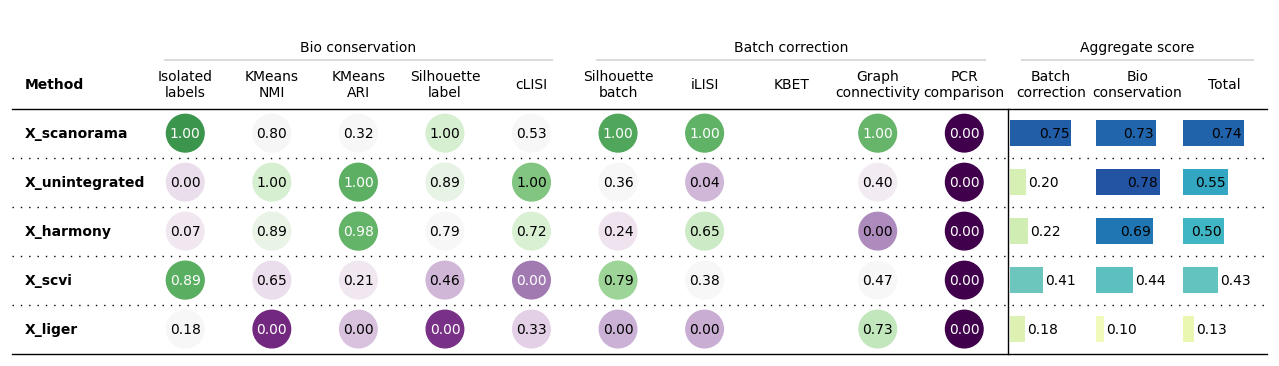

In [41]:
bm.plot_results_table()

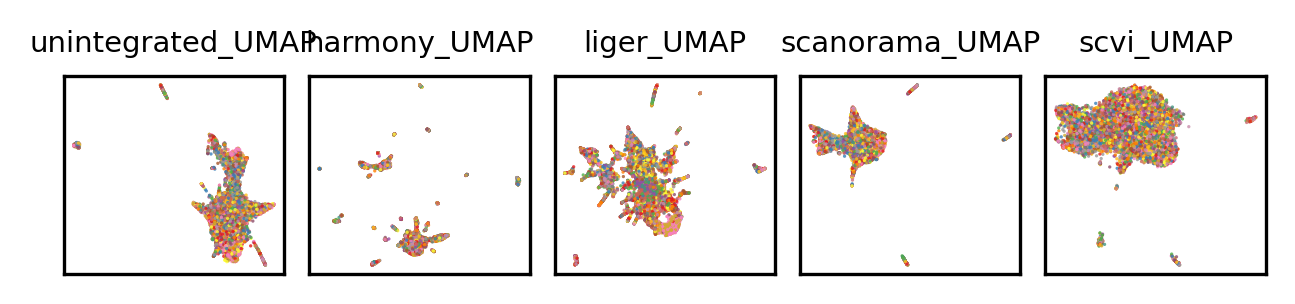

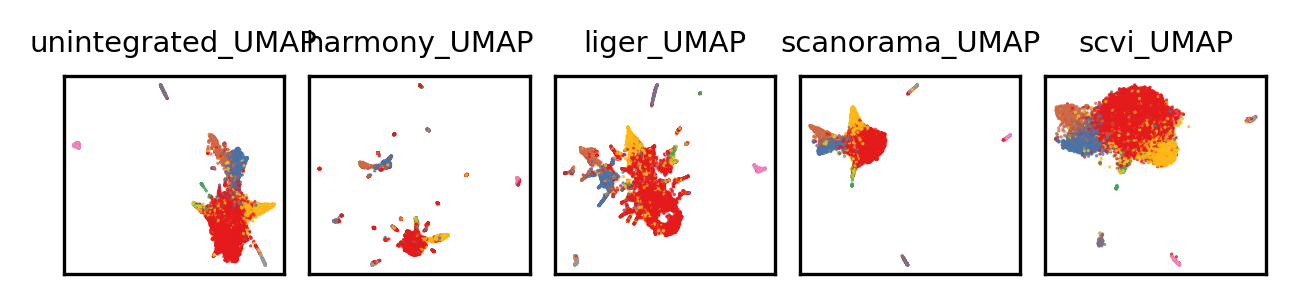

In [46]:
ccd.pl.plot_all_embeddings(
    adata=adata,
    combined_keys=['unintegrated_UMAP', 'harmony_UMAP', 'liger_UMAP', 'scanorama_UMAP', 'scvi_UMAP'],
    color_bys = [batch_key, state_key],  # e.g., batch_key is 'dataset', state_key is 'cell_type'
    basis_types=['UMAP'],
)

In [ ]:
# save the adata object
adata.write_h5ad(data_dir / f"{file_name}_final.h5ad")

# concord pipeline test

In [4]:
adata = sc.read_h5ad(data_dir / f"{file_name}_final.h5ad")

In [5]:
batch_key = 'dataset'
state_key = 'cell_type'

In [6]:
device = 'cuda'

In [7]:
adata

AnnData object with n_obs × n_vars = 9990 × 2000
    obs: 'kit', 'organism_ontology_term_id', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'predicted_celltype', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'dataset'
    var: 'feature_is_filtered', 'feature_reference', 'feature_biotype', 'gene_name-10X_3-rep1_annotated', 'highly_deviant-10X_3-rep1_annotated', 'feature_name-10X_3-rep1_annotated', 'feature_length-10X_3-rep1_annotated', 'feature_type-10X_3-rep1_annotated', 'gene_name-10X_3-rep2_annotated', 'highly_deviant-10X_3-rep2_annotated', 'feature_name-10X_3-rep2_annotated', 'feature_length-10X_3-rep2_annotated', 'feature_type-10X_3-rep2_annotated', 'gene_name-10X_5

## concord_knn

In [8]:
cur_ccd_knn = ccd.Concord(adata=adata, verbose=True, device = device, domain_key=batch_key)


Concord - INFO - Operating directly on the provided AnnData object. Object may be modified.
Concord - INFO - Setting sampler_knn to 999 to be 1/10 the number of cells in the dataset. You can change this value by setting sampler_knn in the configuration.
Concord - WARNING - No input feature list provided. It is recommended to first select features using the command `concord.ul.select_features()`.
Concord - INFO - Proceeding with all 2000 features in the dataset.
Concord - INFO - Column 'dataset' is already of type: category
Concord - INFO - Unused levels dropped for column 'dataset'.


In [9]:
# cur_ccd_knn.config.to_dict()
print(f'clr_beta:', cur_ccd_knn.config.clr_beta)
print(f'p_intra_domain:', cur_ccd_knn.config.p_intra_domain)
print(f'p_intra_knn:', cur_ccd_knn.config.p_intra_knn)

clr_beta: 0.0
p_intra_domain: 0.98
p_intra_knn: 0.3


In [13]:
cur_ccd_knn.fit_transform(output_key="X_concord_knn",)

Epoch 1 Training: 100%|██████████| 148/148 [00:00<00:00, 204.83it/s, loss=3.44]
FAISS not found. Using sklearn for k-NN computation.
Epoch 9 Training: 100%|██████████| 148/148 [00:00<00:00, 199.54it/s, loss=3.33]


In [7]:
ccd.ul.run_concord(
    adata=adata,
    batch_key=batch_key,
    class_key=state_key,
    output_key="X_concord_knn",
    latent_dim=30,
    return_corrected=False,
    seed=42,
    device=device,
    save_dir=None,
    mode = 'default',
    n_epochs=10,
    batch_size=64,
)

Concord - WARNING - save_dir is None. Model and log files will not be saved.
Concord - WARNING - No input feature list provided. It is recommended to first select features using the command `concord.ul.select_features()`.


Epoch 1 Training: 100%|██████████| 148/148 [00:00<00:00, 198.13it/s, loss=3.51]
FAISS not found. Using sklearn for k-NN computation.
Epoch 9 Training: 100%|██████████| 148/148 [00:00<00:00, 159.99it/s, loss=3.25]

Concord - WARNING - save_dir is None. Skipping model/config saving.


----

In [10]:
time_log, ram_log, vram_log = ccd.bm.run_integration_methods_pipeline(
    adata=adata,
    methods=['concord_knn'],
    batch_key=batch_key,
    count_layer="counts",
    class_key=state_key,
    latent_dim=30,
    device=device,
    return_corrected=False,
    transform_batch=None,
    seed=0,
    compute_umap=False,
    umap_n_components=2,
    umap_n_neighbors=30,
    umap_min_dist=0.5,
    verbose=True
)

Concord - WARNING - save_dir is None. Model and log files will not be saved.
Concord - WARNING - No input feature list provided. It is recommended to first select features using the command `concord.ul.select_features()`.


Epoch 1 Training: 100%|██████████| 148/148 [00:00<00:00, 168.20it/s, loss=3.59]
FAISS not found. Using sklearn for k-NN computation.
Epoch 9 Training: 100%|██████████| 148/148 [00:00<00:00, 166.14it/s, loss=3.36]


Concord - WARNING - save_dir is None. Skipping model/config saving.


concord_knn completed in 11.77 sec.
✅ Selected methods completed.


In [27]:
adata

AnnData object with n_obs × n_vars = 9990 × 2000
    obs: 'kit', 'organism_ontology_term_id', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'predicted_celltype', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'dataset'
    var: 'feature_is_filtered', 'feature_reference', 'feature_biotype', 'gene_name-10X_3-rep1_annotated', 'highly_deviant-10X_3-rep1_annotated', 'feature_name-10X_3-rep1_annotated', 'feature_length-10X_3-rep1_annotated', 'feature_type-10X_3-rep1_annotated', 'gene_name-10X_3-rep2_annotated', 'highly_deviant-10X_3-rep2_annotated', 'feature_name-10X_3-rep2_annotated', 'feature_length-10X_3-rep2_annotated', 'feature_type-10X_3-rep2_annotated', 'gene_name-10X_5

## concord_hcl

In [18]:
cur_ccd_hcl = ccd.Concord(adata=adata, verbose=True, device = device, domain_key=batch_key, 
                      clr_beta=1.0, p_intra_domain=0.98, p_intra_knn=0)


Concord - INFO - Operating directly on the provided AnnData object. Object may be modified.
Concord - INFO - Setting sampler_knn to 999 to be 1/10 the number of cells in the dataset. You can change this value by setting sampler_knn in the configuration.
Concord - INFO - Using NT-Xent loss with beta=1.0. This will apply hard-negative weighting to the contrastive loss.
Concord - WARNING - Using NT-Xent loss with beta > 0 and p_intra_domain < 1.0 may lead to non-ideal batch correction. Consider setting p_intra_domain to 1.0 for best results.
Concord - WARNING - No input feature list provided. It is recommended to first select features using the command `concord.ul.select_features()`.
Concord - INFO - Proceeding with all 2000 features in the dataset.
Concord - INFO - Column 'dataset' is already of type: category
Concord - INFO - Unused levels dropped for column 'dataset'.


In [19]:
print(f'clr_beta:', cur_ccd_hcl.config.clr_beta)
print(f'p_intra_domain:', cur_ccd_hcl.config.p_intra_domain)
print(f'p_intra_knn:', cur_ccd_hcl.config.p_intra_knn)

clr_beta: 1.0
p_intra_domain: 0.98
p_intra_knn: 0


----

In [11]:
time_log, ram_log, vram_log = ccd.bm.run_integration_methods_pipeline(
    adata=adata,
    methods=['concord_hcl'],
    batch_key=batch_key,
    count_layer="counts",
    class_key=state_key,
    latent_dim=30,
    device=device,
    return_corrected=False,
    transform_batch=None,
    seed=0,
    compute_umap=False,
    umap_n_components=2,
    umap_n_neighbors=30,
    umap_min_dist=0.5,
    verbose=True
)

Concord - WARNING - save_dir is None. Model and log files will not be saved.
Concord - WARNING - Using NT-Xent loss with beta > 0 and p_intra_domain < 1.0 may lead to non-ideal batch correction. Consider setting p_intra_domain to 1.0 for best results.
Concord - WARNING - No input feature list provided. It is recommended to first select features using the command `concord.ul.select_features()`.


Epoch 9 Training: 100%|██████████| 148/148 [00:01<00:00, 140.39it/s, loss=3.52]

Concord - WARNING - save_dir is None. Skipping model/config saving.



concord_hcl completed in 12.55 sec.
✅ Selected methods completed.


In [30]:
adata

AnnData object with n_obs × n_vars = 9990 × 2000
    obs: 'kit', 'organism_ontology_term_id', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'predicted_celltype', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'dataset'
    var: 'feature_is_filtered', 'feature_reference', 'feature_biotype', 'gene_name-10X_3-rep1_annotated', 'highly_deviant-10X_3-rep1_annotated', 'feature_name-10X_3-rep1_annotated', 'feature_length-10X_3-rep1_annotated', 'feature_type-10X_3-rep1_annotated', 'gene_name-10X_3-rep2_annotated', 'highly_deviant-10X_3-rep2_annotated', 'feature_name-10X_3-rep2_annotated', 'feature_length-10X_3-rep2_annotated', 'feature_type-10X_3-rep2_annotated', 'gene_name-10X_5

## contrastive

In [12]:
time_log, ram_log, vram_log = ccd.bm.run_integration_methods_pipeline(
    adata=adata,
    methods=['contrastive'],
    batch_key=batch_key,
    count_layer="counts",
    class_key=state_key,
    latent_dim=30,
    device=device,
    return_corrected=False,
    transform_batch=None,
    seed=0,
    compute_umap=False,
    umap_n_components=2,
    umap_n_neighbors=30,
    umap_min_dist=0.5,
    verbose=True
)

Concord - WARNING - save_dir is None. Model and log files will not be saved.
Concord - WARNING - No input feature list provided. It is recommended to first select features using the command `concord.ul.select_features()`.
Concord - WARNING - domain/batch information not found, all samples will be treated as from single domain/batch.
Concord - WARNING - Only one domain found in the data. Setting p_intra_domain to 1.0.


Epoch 9 Training: 100%|██████████| 156/156 [00:00<00:00, 192.24it/s, loss=3.3] 

Concord - WARNING - save_dir is None. Skipping model/config saving.



contrastive completed in 9.67 sec.
✅ Selected methods completed.


In [13]:
adata

AnnData object with n_obs × n_vars = 9990 × 2000
    obs: 'kit', 'organism_ontology_term_id', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'predicted_celltype', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'dataset', 'tmp_domain_label'
    var: 'feature_is_filtered', 'feature_reference', 'feature_biotype', 'gene_name-10X_3-rep1_annotated', 'highly_deviant-10X_3-rep1_annotated', 'feature_name-10X_3-rep1_annotated', 'feature_length-10X_3-rep1_annotated', 'feature_type-10X_3-rep1_annotated', 'gene_name-10X_3-rep2_annotated', 'highly_deviant-10X_3-rep2_annotated', 'feature_name-10X_3-rep2_annotated', 'feature_length-10X_3-rep2_annotated', 'feature_type-10X_3-rep2_annotate

In [14]:
# print the time RAM and VRAM logs
print("Time log:")
print(f"{time_log} sec")
print("\nRAM log:")
print(f"{ram_log} MB")
print("\nVRAM log:")
print(f"{vram_log} MB")

Time log:
{'contrastive': 9.671231031417847} sec

RAM log:
{'contrastive': 154.578125} MB

VRAM log:
{'contrastive': 20.89208984375} MB


In [15]:
# run UMAP
for method in ['concord_knn', 'concord_hcl', 'contrastive']:
    ccd.ul.run_umap(adata, source_key=f"{method}", result_key=f"{method}_UMAP")

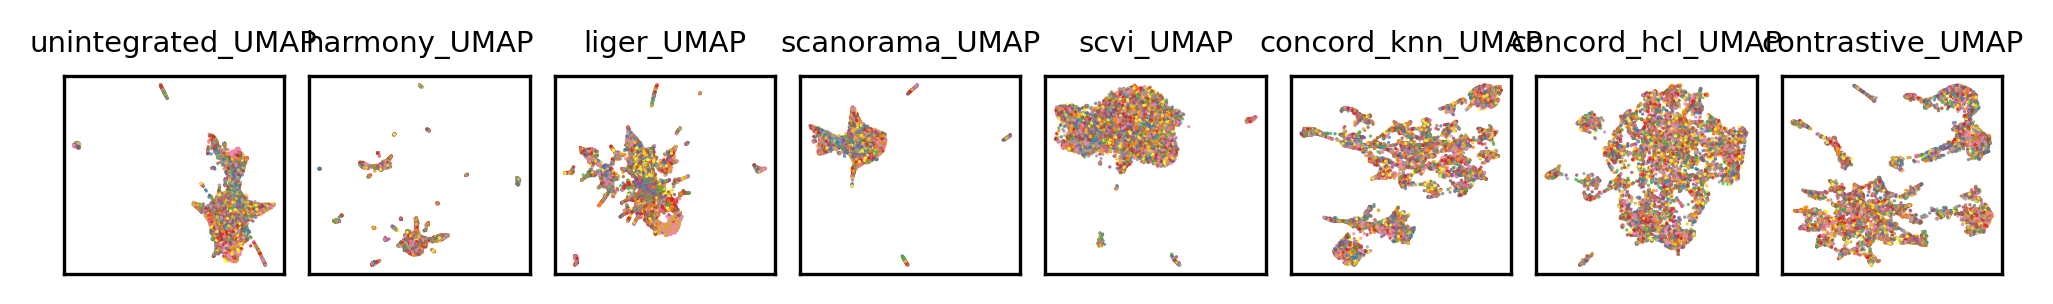

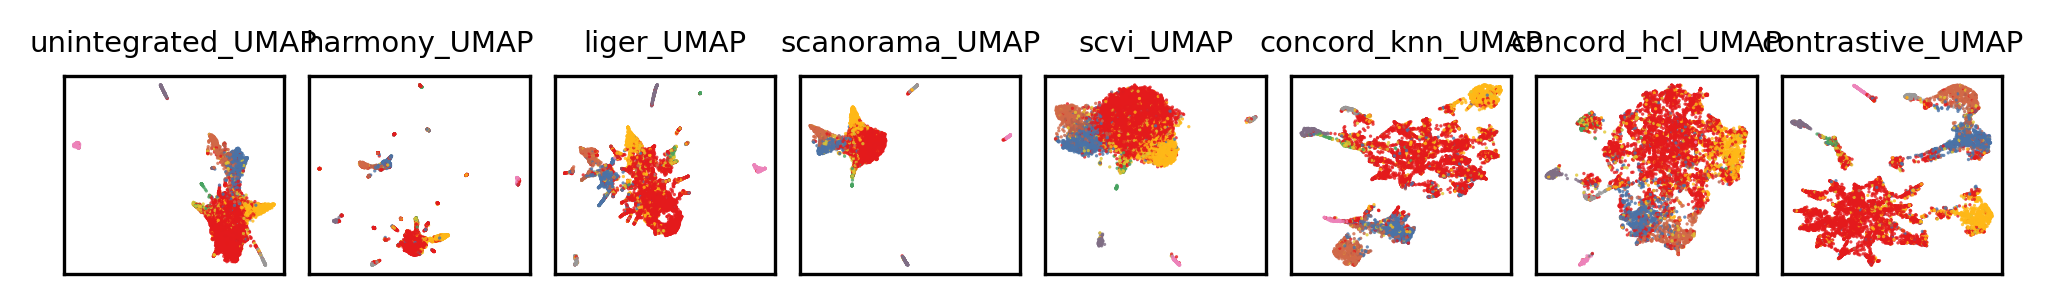

In [16]:
ccd.pl.plot_all_embeddings(
    adata=adata,
    combined_keys=['unintegrated_UMAP', 'harmony_UMAP', 'liger_UMAP', 'scanorama_UMAP', 'scvi_UMAP', 'concord_knn_UMAP', 'concord_hcl_UMAP', 'contrastive_UMAP'],
    color_bys = [batch_key, state_key],  # e.g., batch_key is 'dataset', state_key is 'cell_type'
    basis_types=['UMAP'],
)

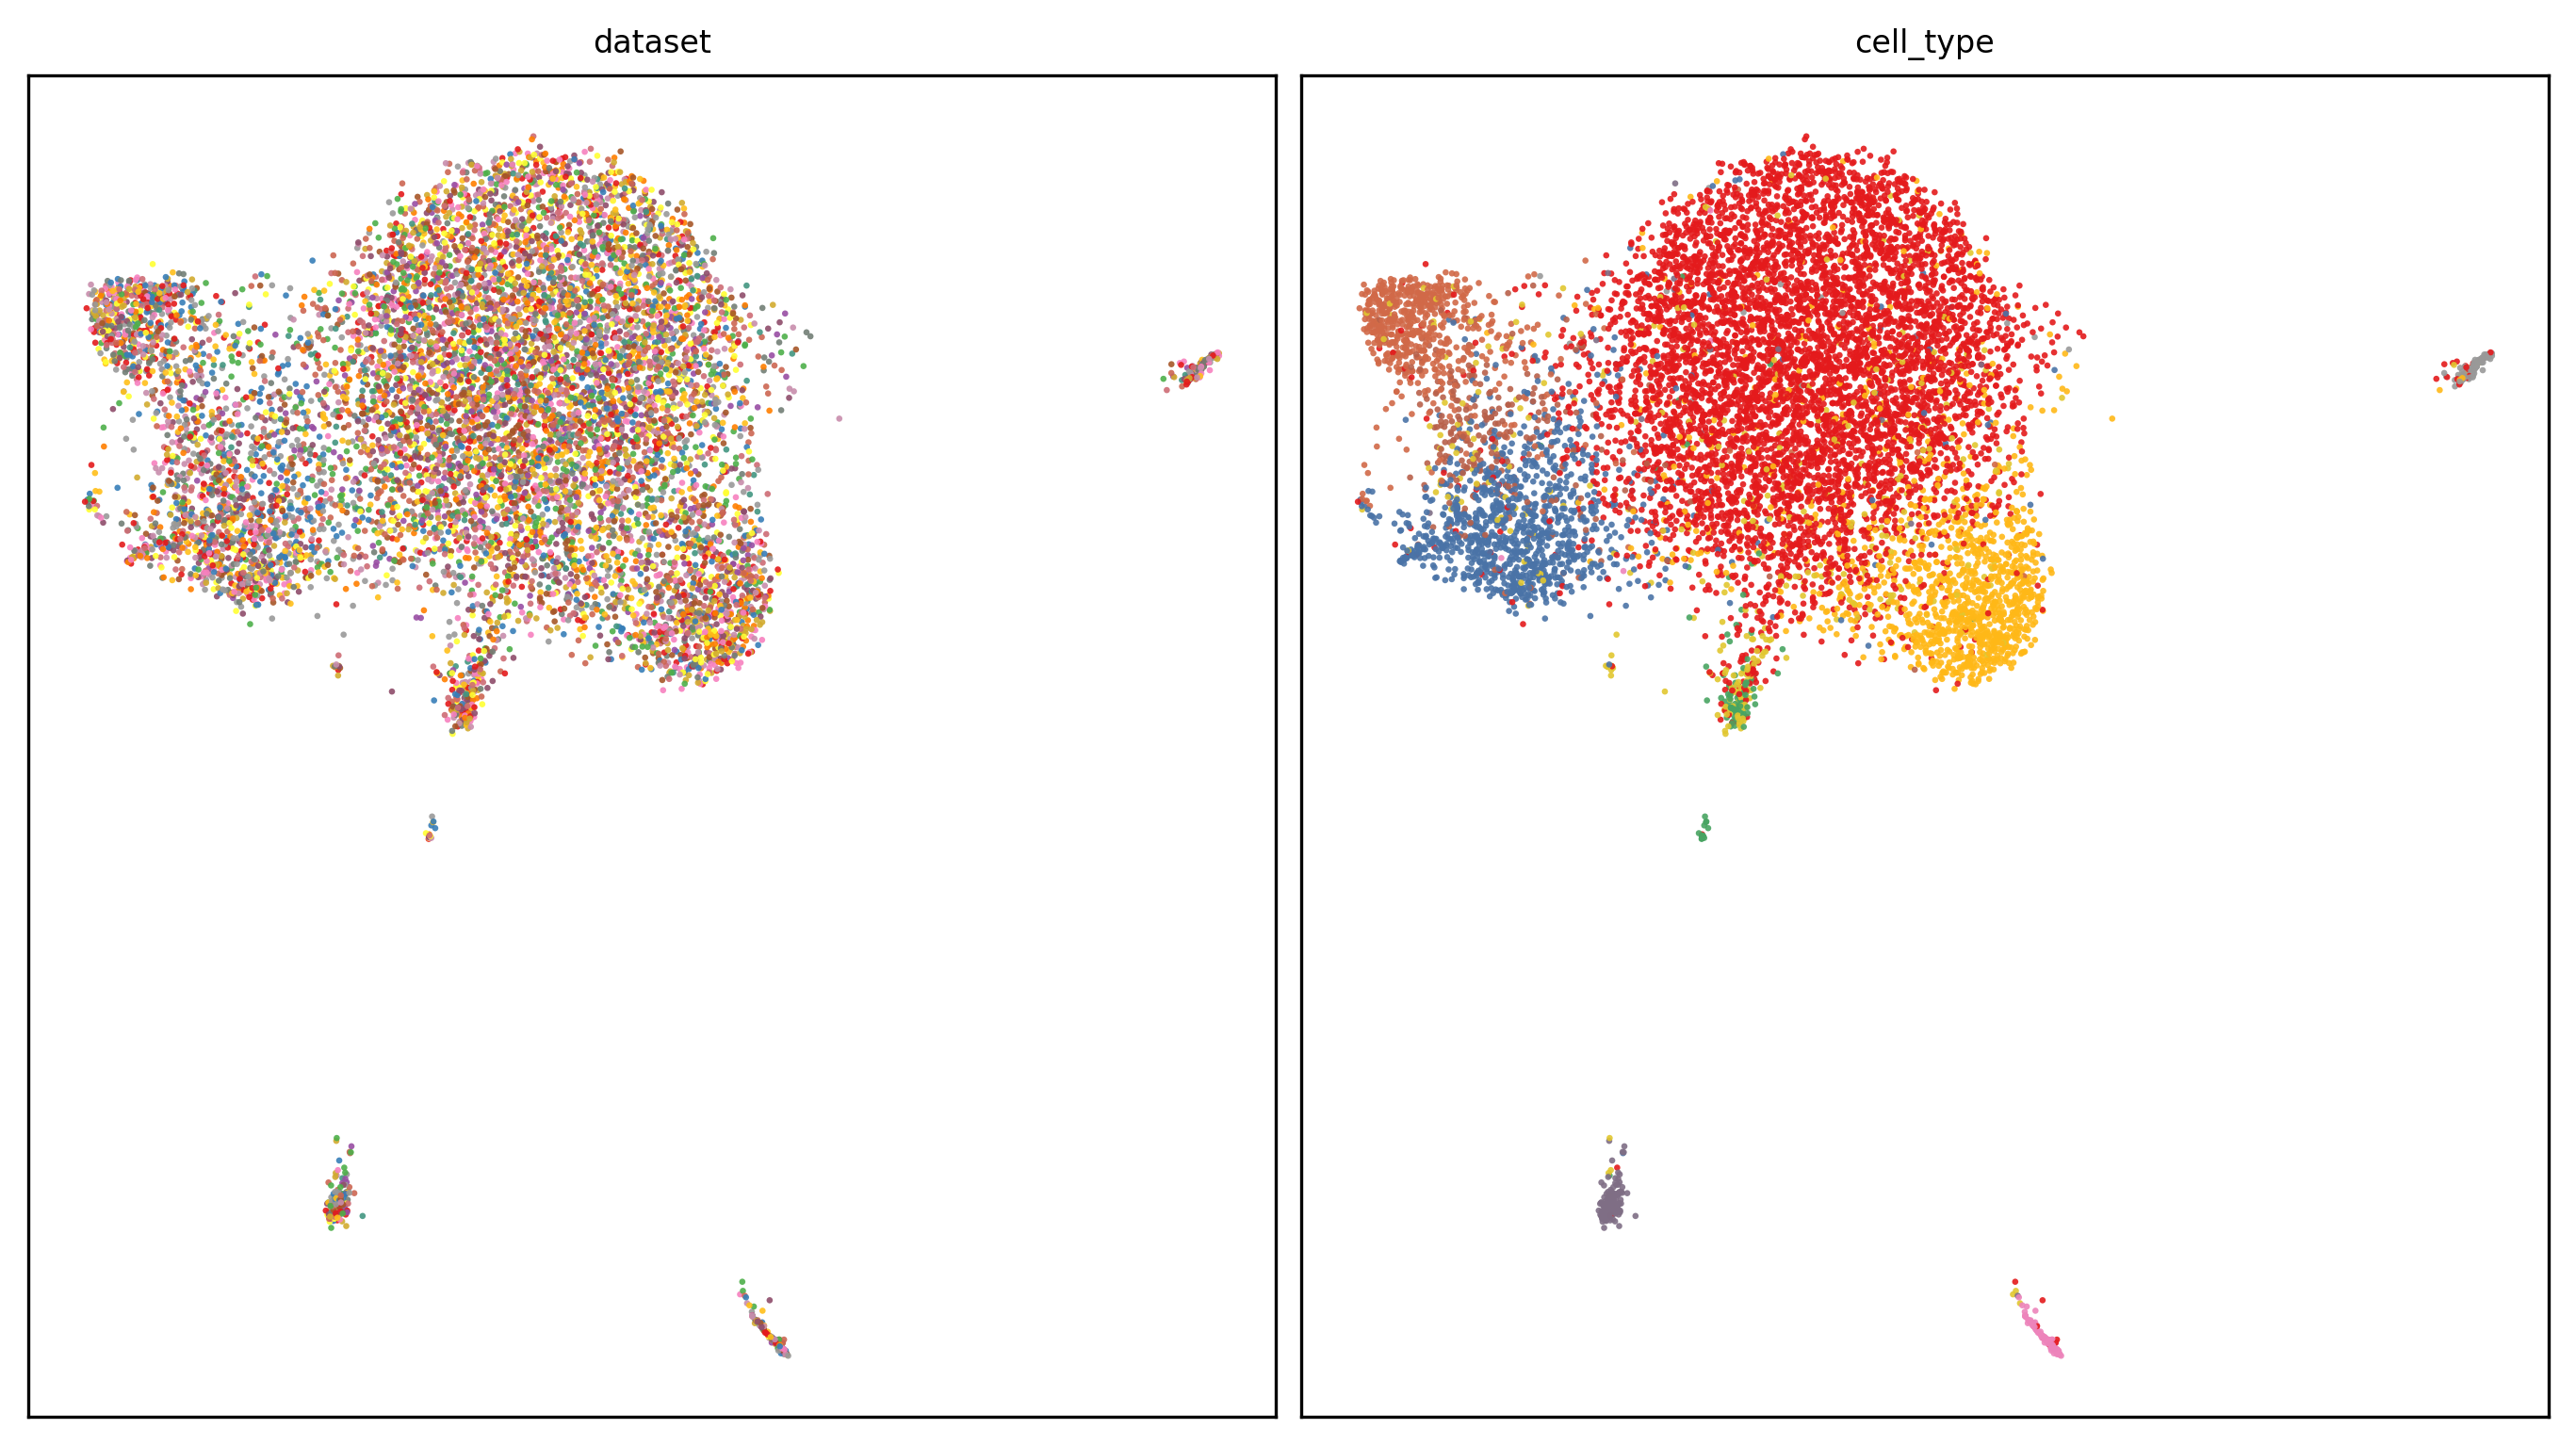

In [17]:
ccd.pl.plot_embedding(
    adata=adata,
    basis='scvi_UMAP',
    color_by=[batch_key,state_key],
    ncols=2,
    save_path=None,
    legend_loc=None,
    figsize=(9,5)
)


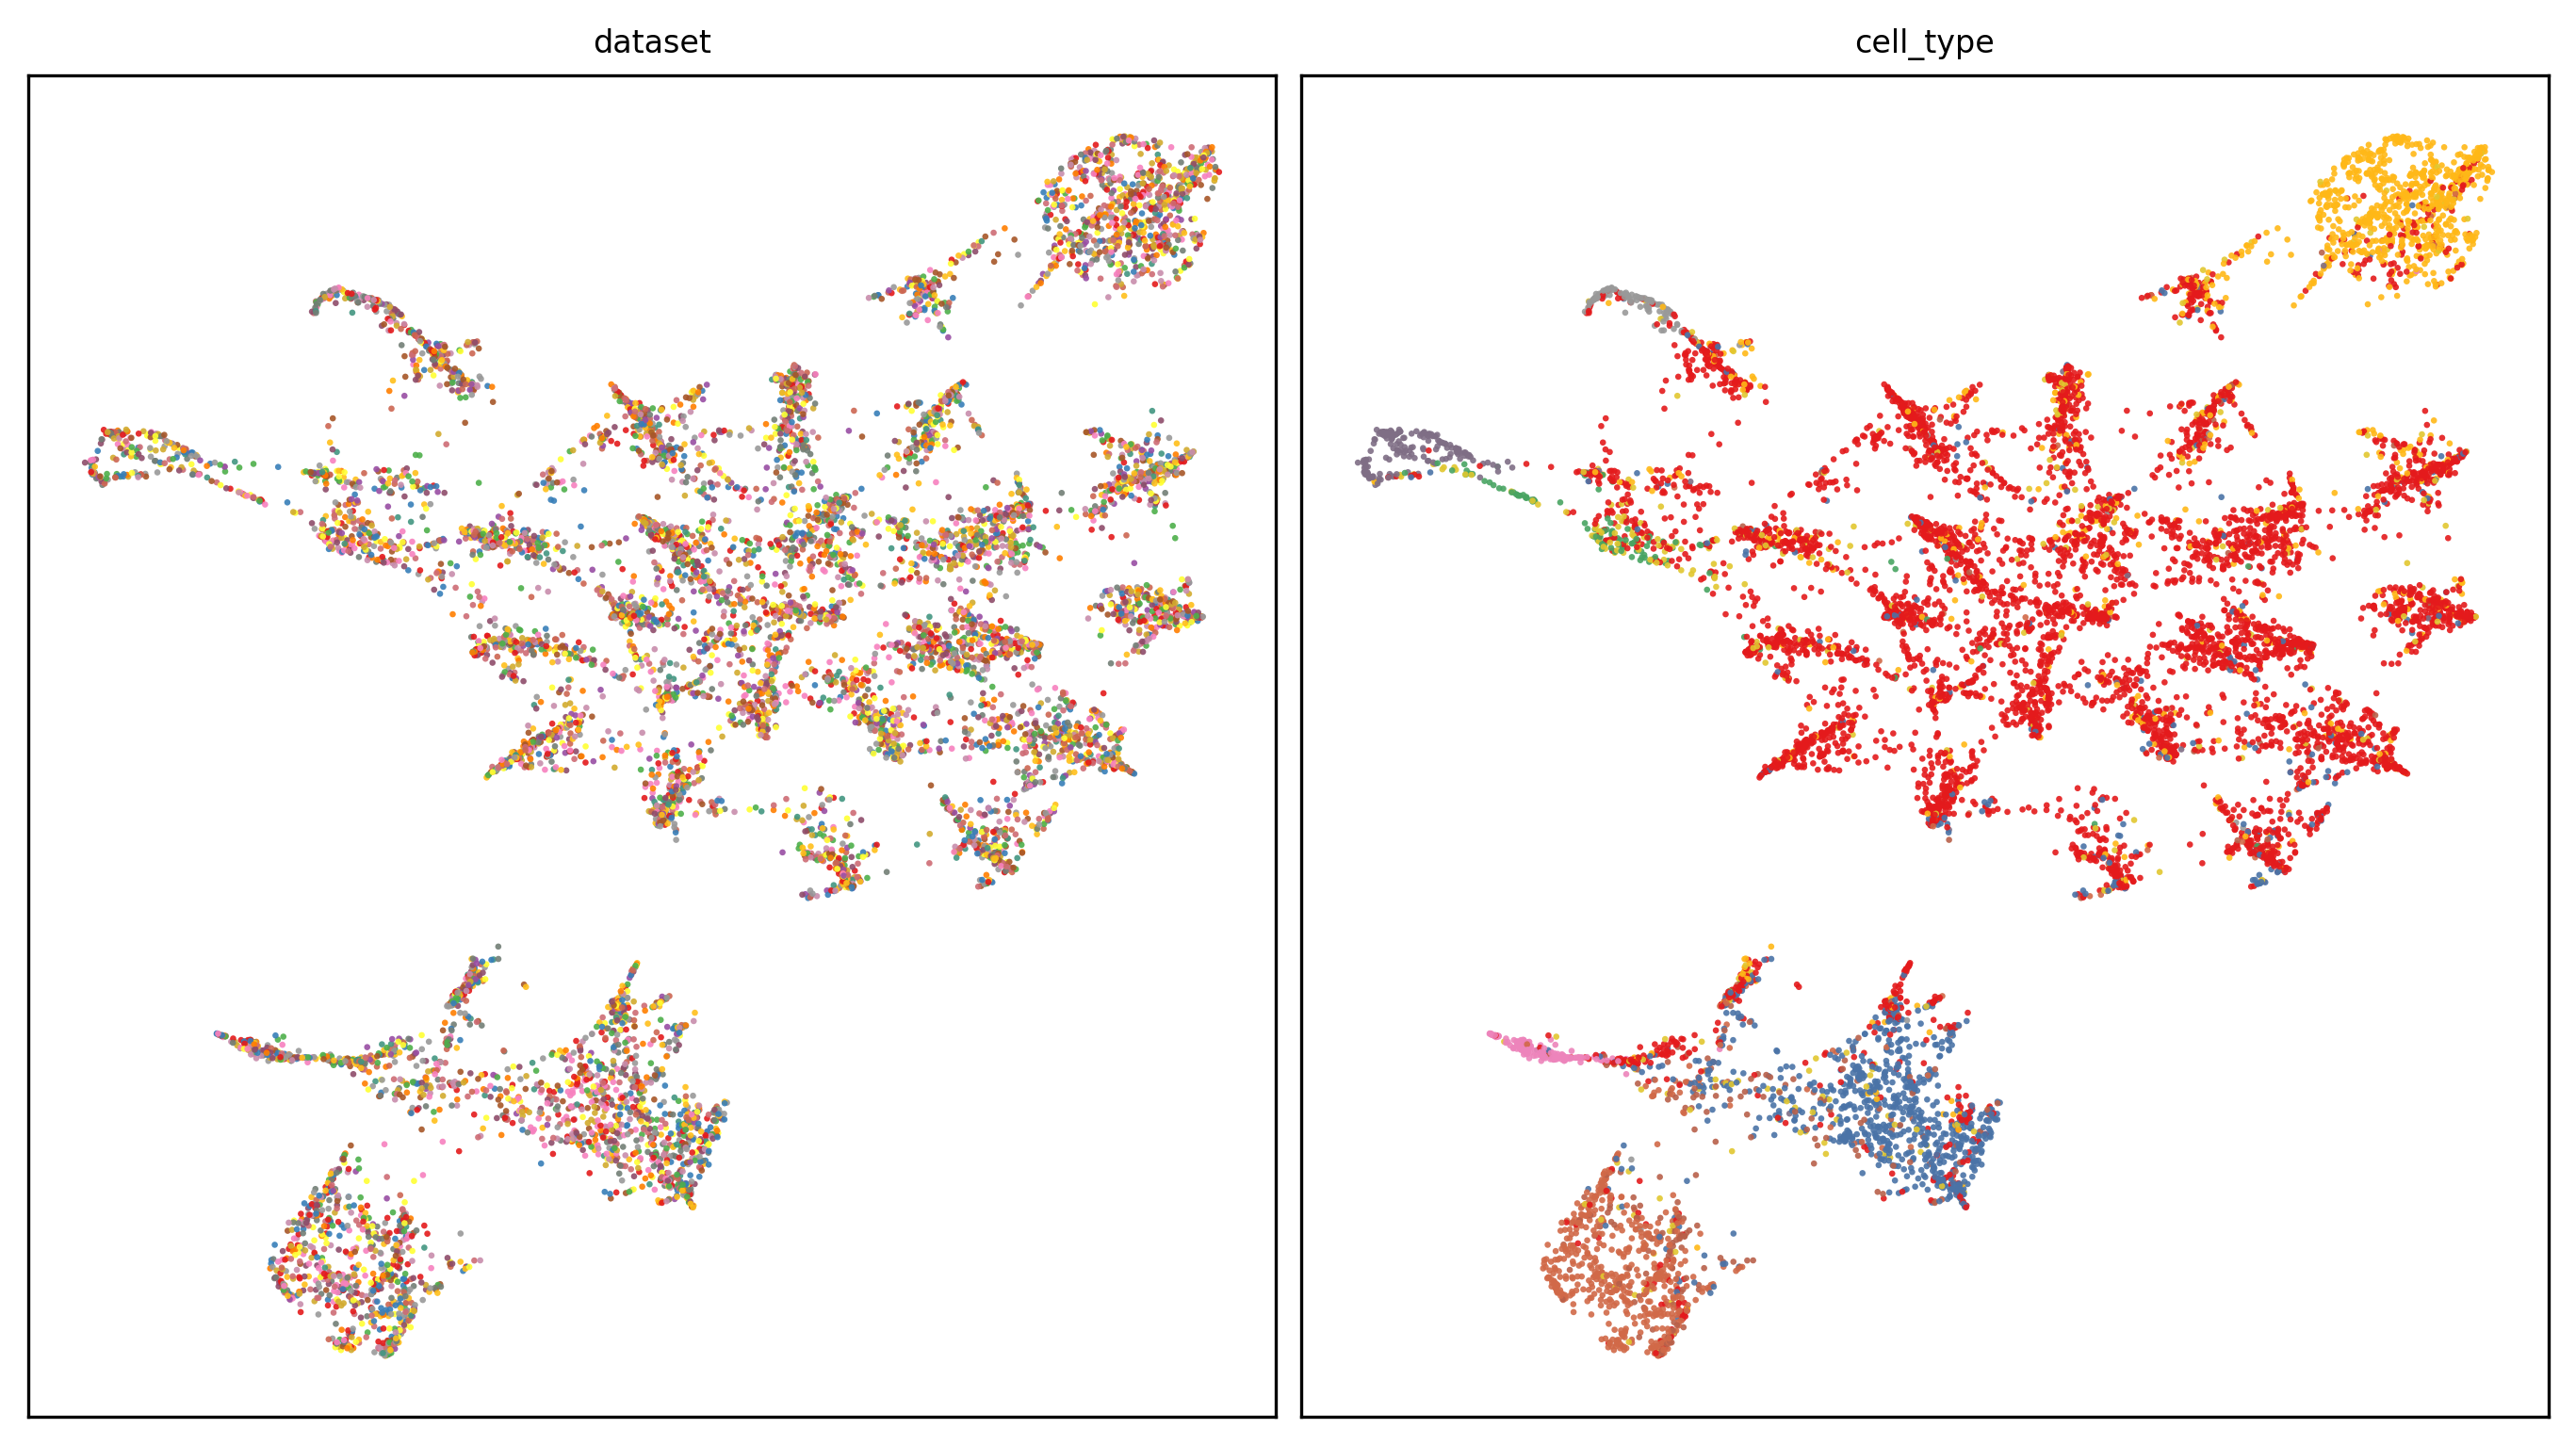

In [18]:
ccd.pl.plot_embedding(
    adata=adata,
    basis='concord_knn_UMAP',
    color_by=[batch_key,state_key],
    ncols=2,
    save_path=None,
    legend_loc=None,
    figsize=(9,5)
)

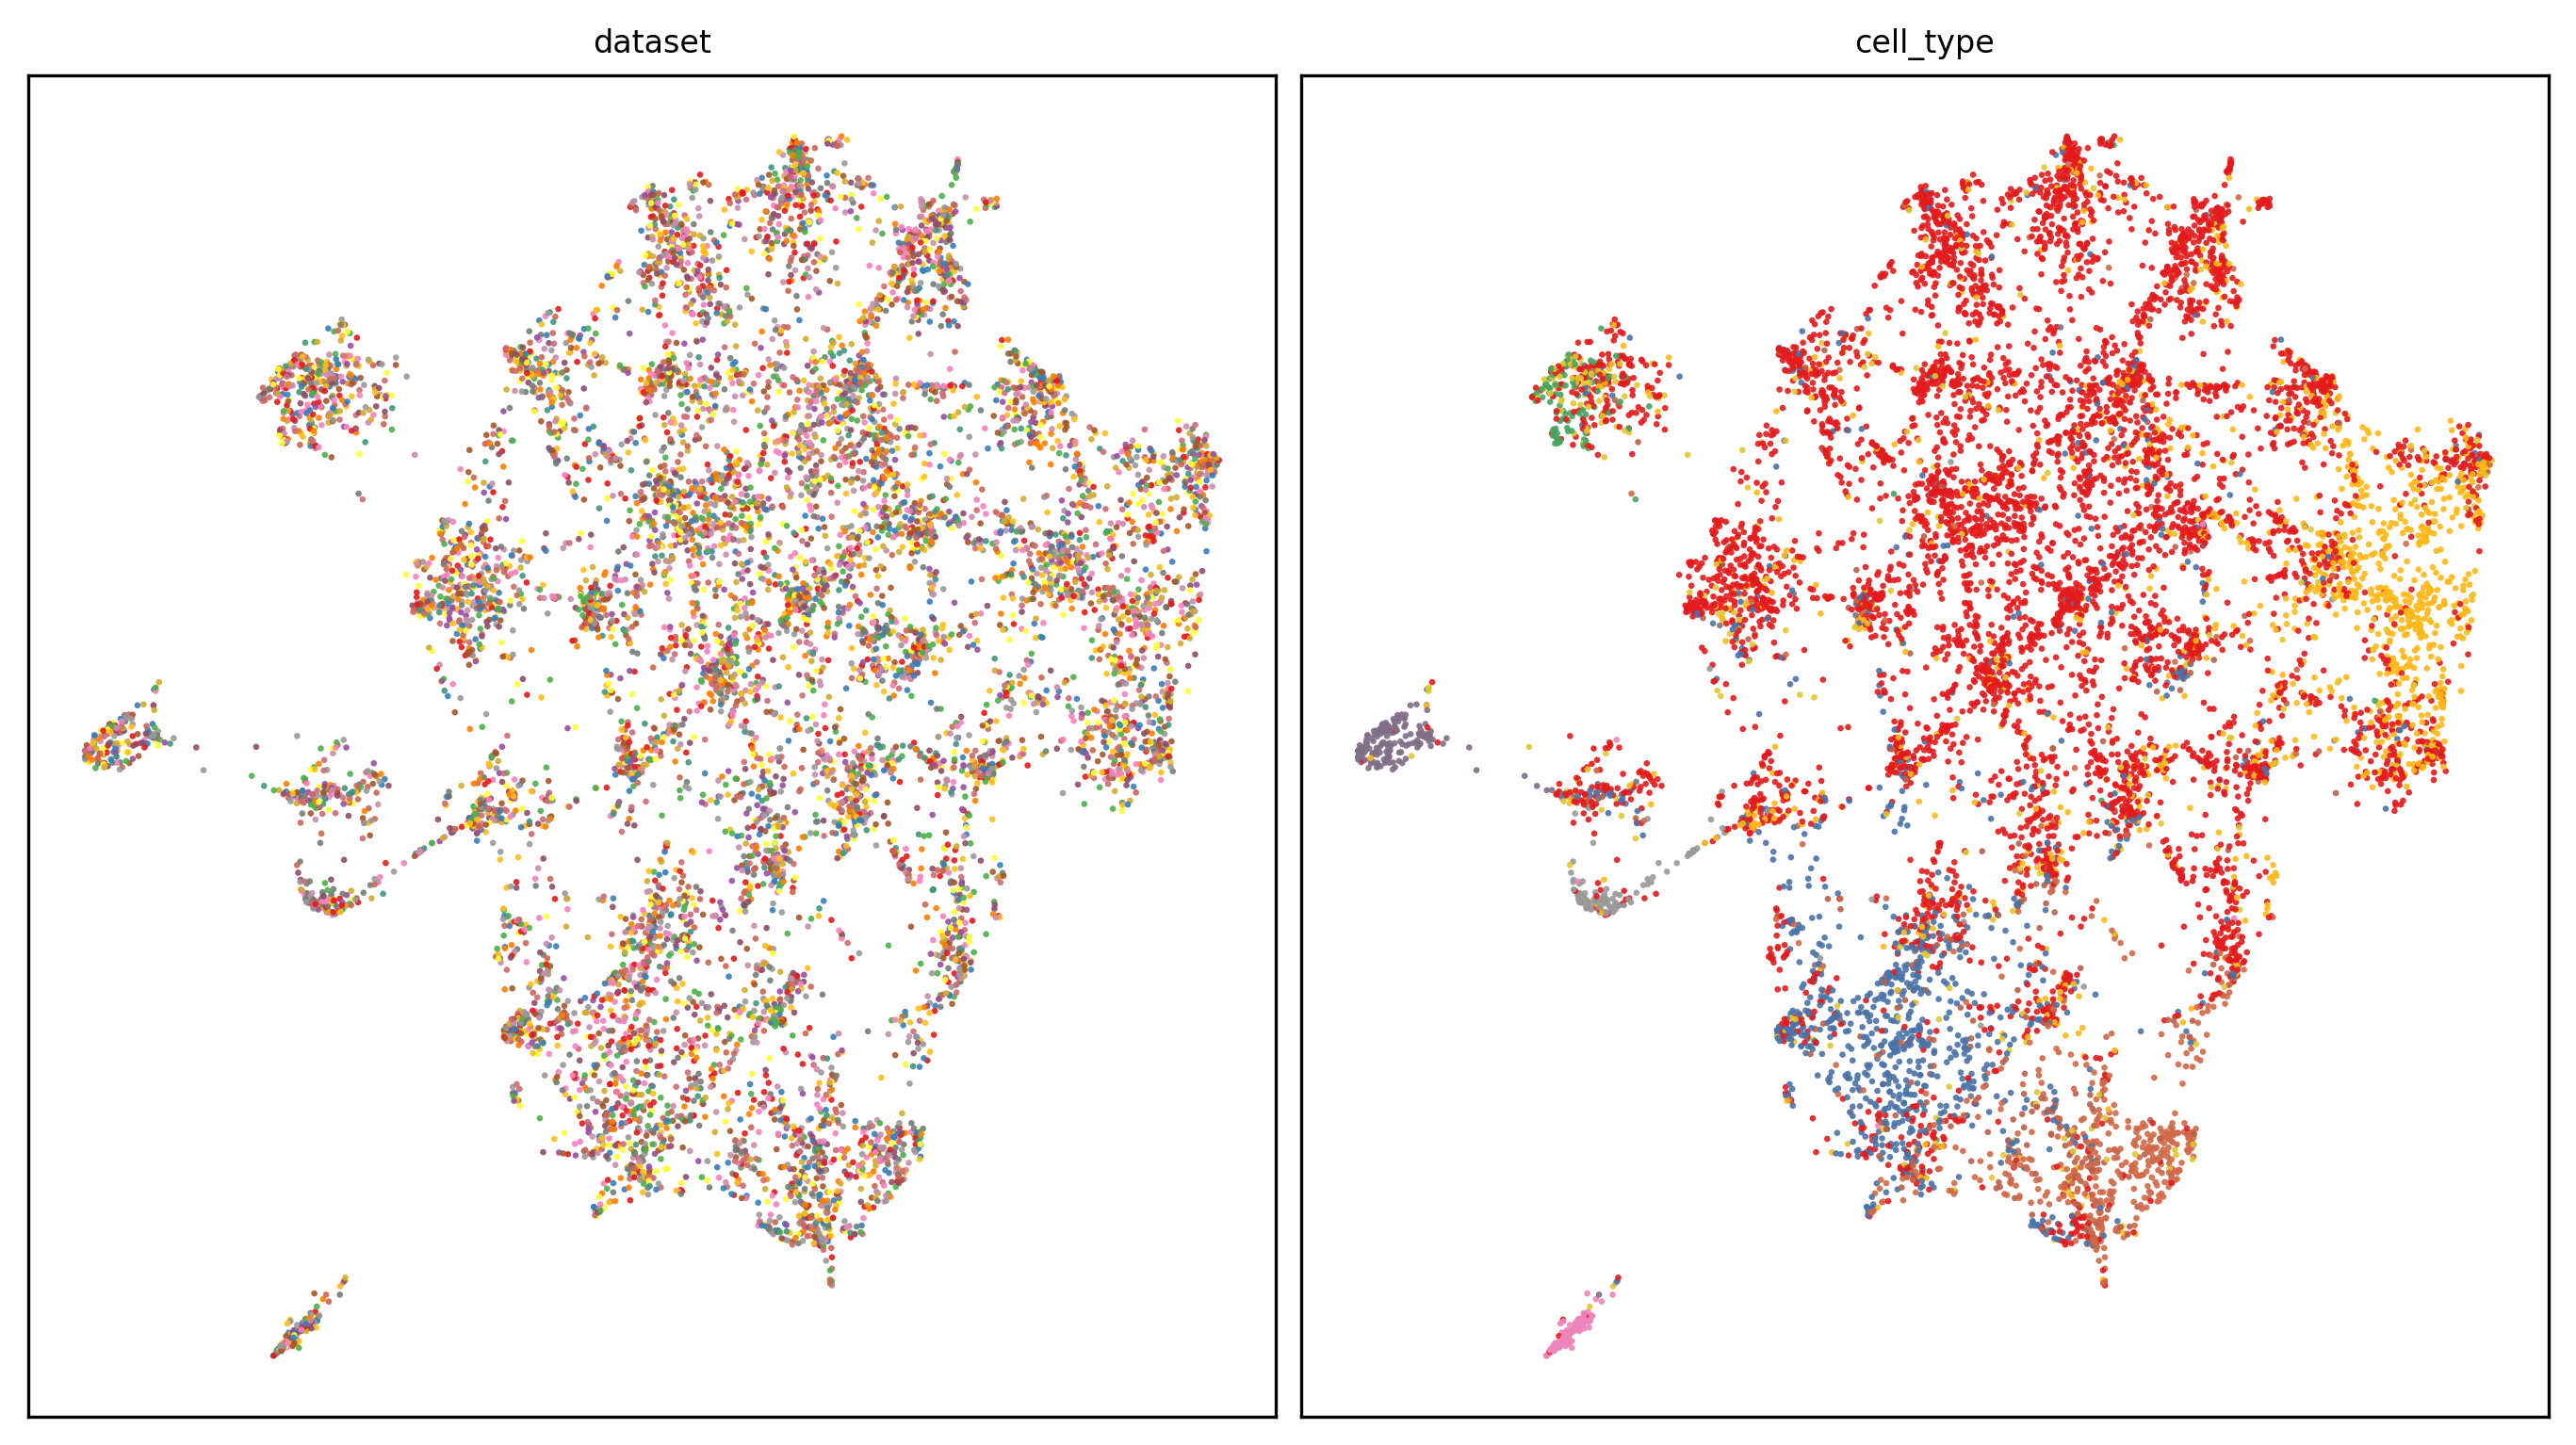

In [27]:
ccd.pl.plot_embedding(
    adata=adata,
    basis='concord_hcl_UMAP',
    color_by=[batch_key,state_key],
    save_path=None,
    ncols=2,
    legend_loc=None,
    figsize=(9,5)
)

# linear probe and knn probe

In [5]:
adata = sc.read_h5ad(data_dir / f"{file_name}_final.h5ad")

In [6]:
batch_key = 'dataset'
state_key = 'cell_type'

In [7]:
adata

AnnData object with n_obs × n_vars = 9990 × 2000
    obs: 'kit', 'organism_ontology_term_id', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'predicted_celltype', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'dataset'
    var: 'feature_is_filtered', 'feature_reference', 'feature_biotype', 'gene_name-10X_3-rep1_annotated', 'highly_deviant-10X_3-rep1_annotated', 'feature_name-10X_3-rep1_annotated', 'feature_length-10X_3-rep1_annotated', 'feature_type-10X_3-rep1_annotated', 'gene_name-10X_3-rep2_annotated', 'highly_deviant-10X_3-rep2_annotated', 'feature_name-10X_3-rep2_annotated', 'feature_length-10X_3-rep2_annotated', 'feature_type-10X_3-rep2_annotated', 'gene_name-10X_5

In [ ]:
from concord.benchmarking import KNNProbeEvaluator
knneval_results = {}
ignore_values=['unannotated', 'nan', 'NaN', np.nan, 'NA']
for target_key in target_keys:
    knn_eval = KNNProbeEvaluator(
        adata         = adata,
        emb_keys      = combined_keys,
        target_key    = target_key,
        ignore_values = ignore_values,
        k             = 15,
        return_preds  = True,
    )
    metrics_df, preds_bank = knn_eval.run()
    knneval_results[target_key] = metrics_df

metrics_map = {
    "embryo.time":      "accuracy",
    "cell_type":        "accuracy",
    "lineage_complete": "accuracy",
    "batch":            "accuracy",
}


In [13]:
from concord.benchmarking import LinearProbeEvaluator
combined_keys = ['X_unintegrated', 'X_harmony', 'X_liger', 'X_scanorama', 'X_scvi', ]
target_keys = [batch_key, state_key]  
ignore_values=['unannotated', 'nan', 'NaN', np.nan, 'NA'],  # ignore unannotated cells
linear_results = {}

for target_key in target_keys:
    print(f"Evaluating {target_key}...")
    evaluator = LinearProbeEvaluator(
        adata=adata,
        emb_keys=combined_keys,
        target_key=target_key,          # or "pseudotime"
        task="auto",                     # "auto" | "classification" | "regression"
        batch_size=128,
        lr=1e-2,
        weight_decay=1e-3,
        epochs=20,                        # default replicates HCL
        print_every=1,
        ignore_values=ignore_values,  # ignore unannotated cells
        return_preds=True,          # whether to return predictions
        device="cpu"                    # or "cpu"
    )
    results_df, pred_bank = evaluator.run()
    linear_results[target_key] = results_df

Evaluating dataset...
[X_unintegrated] epoch   1/20 train 2.9938  val 2.8798
[X_unintegrated] epoch   2/20 train 2.8544  val 2.8795
[X_unintegrated] epoch   3/20 train 2.8563  val 2.8903
[X_unintegrated] epoch   4/20 train 2.8573  val 2.8864
[X_unintegrated] epoch   5/20 train 2.8522  val 2.8787
[X_unintegrated] epoch   6/20 train 2.8535  val 2.8901
[X_unintegrated] epoch   7/20 train 2.8504  val 2.8828
[X_unintegrated] epoch   8/20 train 2.8548  val 2.8923
[X_unintegrated] epoch   9/20 train 2.8580  val 2.8910
[X_unintegrated] epoch  10/20 train 2.8530  val 2.8884
[X_unintegrated] early-stopping at epoch 10
[X_harmony] epoch   1/20 train 2.9885  val 2.8714
[X_harmony] epoch   2/20 train 2.8518  val 2.8723
[X_harmony] epoch   3/20 train 2.8543  val 2.8683
[X_harmony] epoch   4/20 train 2.8550  val 2.8732
[X_harmony] epoch   5/20 train 2.8533  val 2.8804
[X_harmony] epoch   6/20 train 2.8555  val 2.8750
[X_harmony] epoch   7/20 train 2.8561  val 2.8742
[X_harmony] epoch   8/20 train 2.8

In [10]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from typing import Dict, Mapping, Optional


def plot_probe_results(
    results: Dict[str, pd.DataFrame],
    metrics_map: Mapping[str, str],
    *,
    sort_by: Optional[str] = None,   # None | "<task>" | "each"
    ascending: bool = False,
    figsize: tuple = (20, 4),
    bar_kwargs: dict | None = None,
    fontsize: int = 10
):
    """
    Parameters
    ----------
    results      : dict(task -> DataFrame)  – probe outputs (index = embedding)
    metrics_map  : dict(task -> column)     – which column to plot for each task
    sort_by      :
        None     – keep original order
        "<task>" – sort ALL panels by that task's metric
        "each"   – sort EVERY panel individually by its own metric
    ascending    : sort direction (ignored if sort_by is None)
    figsize      : overall figure size
    bar_kwargs   : forwarded to `ax.bar` (e.g. color=..., edgecolor=...)
    """
    tasks = list(metrics_map.keys())
    bar_kwargs = bar_kwargs or {}

    # ------------------------------------------------------------------ #
    #  Decide embedding order(s)
    # ------------------------------------------------------------------ #
    if sort_by is None:
        # single fixed order from the first task
        base_order = list(results[tasks[0]].index)
        orders = {t: base_order for t in tasks}

    elif sort_by == "each":
        orders = {
            t: results[t][metrics_map[t]]
            .sort_values(ascending=ascending)
            .index.tolist()
            for t in tasks
        }
    else:  # sort by a specific task
        if sort_by not in tasks:
            raise ValueError(f"`sort_by` must be one of {tasks} or 'each'")
        ref_metric = metrics_map[sort_by]
        ref_order = (
            results[sort_by][ref_metric]
            .sort_values(ascending=ascending)
            .index.tolist()
        )
        orders = {t: ref_order for t in tasks}

    # ------------------------------------------------------------------ #
    #  Plot
    # ------------------------------------------------------------------ #
    fig, axes = plt.subplots(1, len(tasks), figsize=figsize, sharey=False)

    for ax, task in zip(axes, tasks):
        metric = metrics_map[task]
        order = orders[task]
        vals = results[task][metric].reindex(order)

        ax.bar(np.arange(len(vals)), vals.values, **bar_kwargs)
        ax.set_xticks(range(len(vals)))
        ax.set_xticklabels(vals.index, rotation=90, fontsize=fontsize)
        ax.set_title(f"{task}\n({metric})")

        # nice y-axis limits
        if metric in {"accuracy", "balanced_accuracy", "r2"}:
            ax.set_ylim(0, 1)
        else:  # e.g. MAE
            ax.set_ylim(0, vals.max() * 1.1)

        ax.grid(axis="y", alpha=0.3)

    fig.tight_layout()
    return fig, axes

(<Figure size 2000x400 with 2 Axes>,
 array([<Axes: title={'center': 'dataset\n(accuracy)'}>,
        <Axes: title={'center': 'cell_type\n(accuracy)'}>], dtype=object))

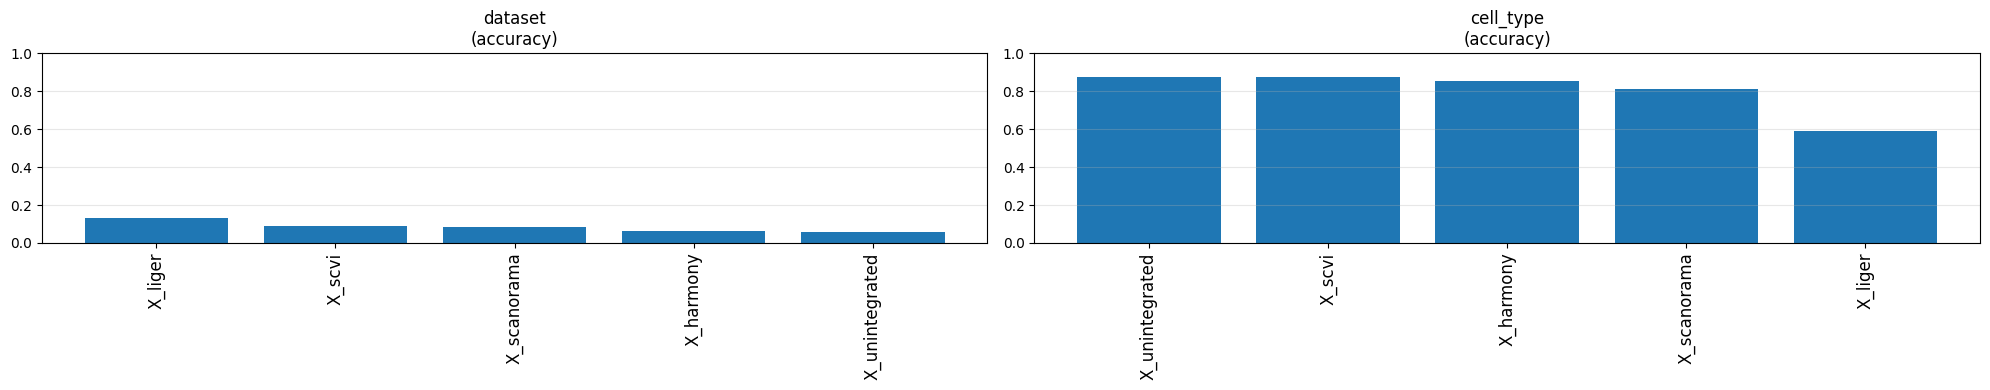

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Decide which metric to plot for each task
metrics_map = {
    batch_key:        "accuracy",
    state_key:            "accuracy",
}


plot_probe_results(linear_results, metrics_map, sort_by="each", fontsize=12)

In [15]:
linear_results

{'dataset':                 accuracy
 embedding               
 X_unintegrated  0.057057
 X_harmony       0.062563
 X_liger         0.129630
 X_scanorama     0.083584
 X_scvi          0.091091,
 'cell_type':                 accuracy
 embedding               
 X_unintegrated  0.875375
 X_harmony       0.853353
 X_liger         0.592593
 X_scanorama     0.813814
 X_scvi          0.874374}